In [269]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from custom_mpl_settings import load_mpl_rc
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.functions.derivatives import (
    smooth_quantity,
)

evol_phase = 'TPAGB'
metallicity = 0.02
table_name = "tracks_Z%7.2e_%s.csv" %(float(metallicity),evol_phase)

array([10.60681993,  0.87693656,  0.90700134,  3.39866565])

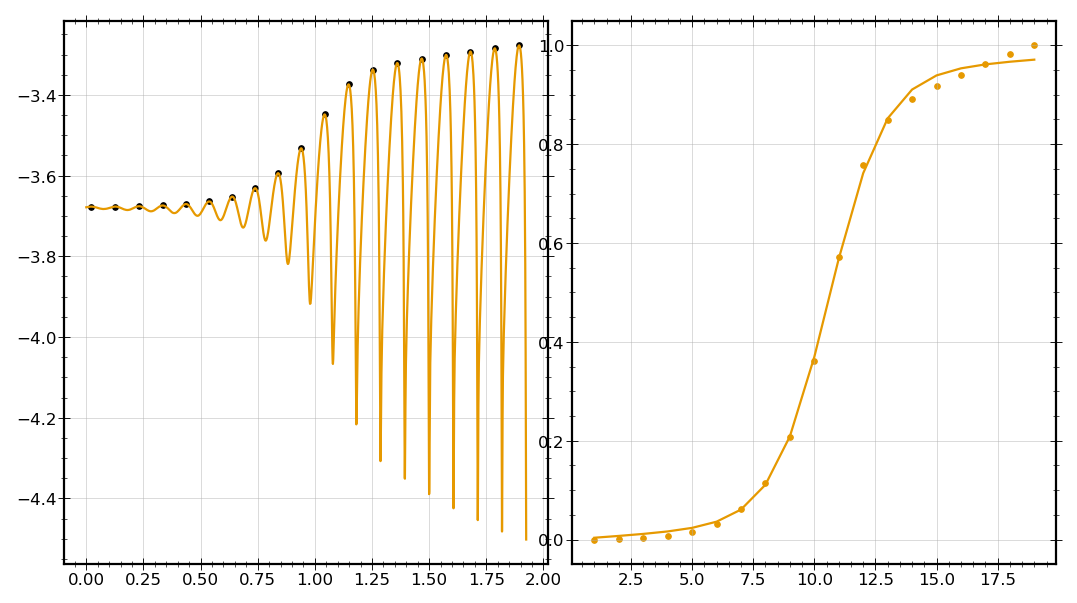

In [145]:
def logistic_growth(x,x0,k,a,b):
    return a/(1+np.exp(-k*(x-x0)))+b/1e3*x

from scipy.optimize import curve_fit
from scipy.signal import argrelextrema


m.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/EAGB/0.93/LOGS_EAGB_3.72')

sec = np.where((m.hist['star_age'])>2.311e6)[0]
time = (m.hist['star_age'][sec]-m.hist['star_age'][sec][0])/1e4
quantity = (-m.hist['log_LHe'])[sec]

fig,ax=plt.subplots(1,2)
ax[0].plot(time,quantity)


maxima = argrelextrema(quantity, np.greater)
NTP = np.arange(1,len(maxima[0])+1,1)
ax[0].scatter(time[maxima],quantity[maxima],c='black')
q_scaled = (quantity[maxima]-quantity[maxima][0])/(quantity[maxima][-1]-quantity[maxima][0])
ax[1].scatter(NTP,q_scaled)

popt, pcov = curve_fit(logistic_growth, NTP, q_scaled,p0 =(NTP[-1]/2,1,1,5))
ax[1].plot(NTP,logistic_growth(NTP, *popt))
# ax[1].set_xscale('log')
popt


array([ 10.2490572 ,   0.33965551,  -2.60970629, 215.11061277])

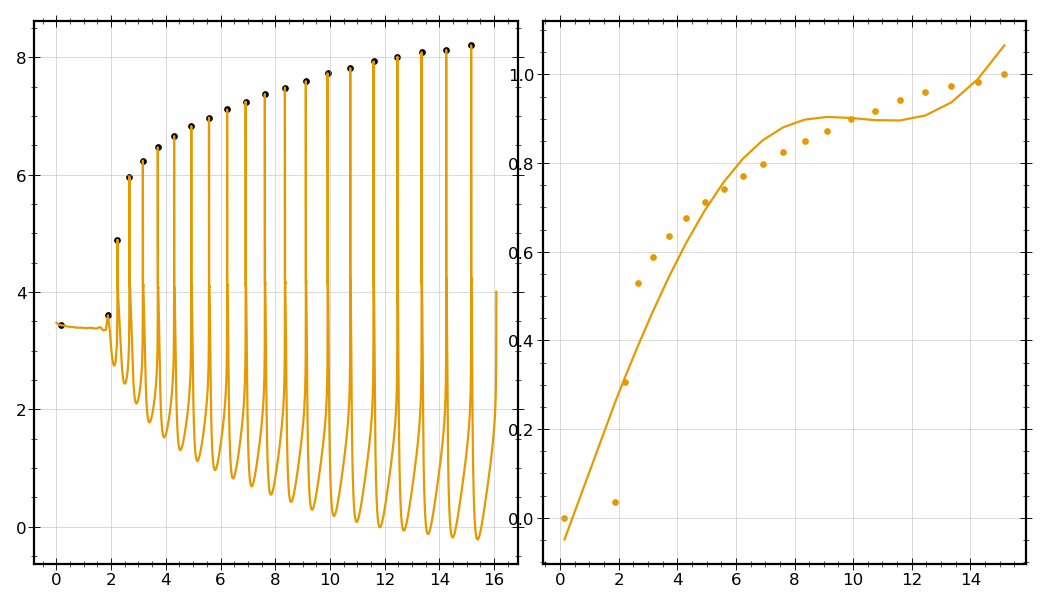

In [178]:
m_eagb = mp.MESA()
m_tpagb = mp.MESA()
m_eagb.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/EAGB/4.74/LOGS_EAGB_4.74')
m_tpagb.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/4.74/LOGS_TPAGB_4.74')

def combine_data(m1,m2,quantity):
    if quantity == 'star_age':
        return np.append(m1.hist[quantity],m1.hist[quantity][-1]+m2.hist[quantity])
    else:
        return np.append(m1.hist[quantity],m2.hist[quantity])

time = combine_data(m_eagb,m_tpagb,'star_age')
y = combine_data(m_eagb,m_tpagb,'log_LHe')
y = np.array((y))

sec = np.where(time>1.55e6)[0]
time = (time[sec]-time[sec][0])/1e4
quantity = y[sec]

fig,ax=plt.subplots(1,2)
ax[0].plot(time,quantity)

def find_maxima(quantity):
    maxima = argrelextrema(quantity, np.greater)[0]
    checked_maxima = [maxima[0]]
    for m in maxima[1:]:
        if quantity[m]>quantity[checked_maxima[-1]]:
            checked_maxima+=[m]

    return checked_maxima

maxima = find_maxima(quantity)

ax[0].scatter(time[maxima],quantity[maxima],c='black')
q_scaled = (quantity[maxima]-quantity[maxima][0])/(quantity[maxima][-1]-quantity[maxima][0])
ax[1].scatter(time[maxima],q_scaled)

popt, pcov = curve_fit(logistic_growth, time[maxima], q_scaled,p0 =(NTP[-1]/2,1,1,5))
ax[1].plot(time[maxima],logistic_growth(time[maxima], *popt))
# ax[1].set_xscale('log')
popt


[ 5.07911683 10.25584827]
[5.14321565 6.3084324 ]
[4.85663353 5.87983423]


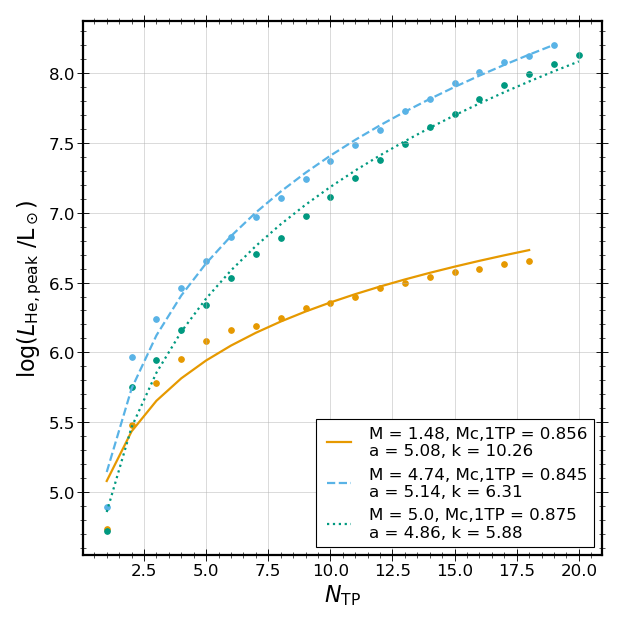

In [417]:
def ln_growth(x,a,b):
    return b*np.log(a*x)

def sqrt_growth(x,a,b):
    return b*np.sqrt(a*x)

def root_growth(x,a,k):
    return a*(x)**(1/k)

quantity_name='log_LHe'

fig,ax=plt.subplots(1,1,figsize = (8,8))

def fit_LHe_peak(ax,logs,quantity_name='log_LHe',first_NTP=1, last_NTP=20):
    # m.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/4.74/LOGS_TPAGB_4.74')
    m.loadHistory(logs)
    quantity = m.hist[quantity_name]
    maxima = find_maxima(quantity)
    time = m.hist['star_age']/1e3
    NTP = np.arange(1,len(maxima)+1,1)

    M = round(m.hist['star_mass'][0],2)
    Mc = round(m.hist['he_core_mass'][0],3)

    # ax[0].plot(time,quantity, label='M = {}, Mc,1TP = {}'.format(M,Mc))
    # ax[0].scatter(time[maxima],quantity[maxima])

    x_fit = NTP[first_NTP-1:last_NTP]
    # x_fit = time[maxima]
    y_fit = quantity[maxima][first_NTP-1:last_NTP]
    # y_fit = (quantity[maxima]-quantity[maxima][0])/(quantity[maxima][-1]-quantity[maxima][0])

    ax.scatter(x_fit,y_fit)
    popt, pcov = curve_fit(root_growth, x_fit, y_fit,p0 =(5,10))
    ax.plot(x_fit,root_growth(x_fit, *popt),label='M = {}, Mc,1TP = {}'.format(M,Mc)+'\na = {}, k = {}'.format(round(popt[0],2),round(popt[1],2)))
    print(popt)

    return ax

ax = fit_LHe_peak(ax,logs='/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/1.48/LOGS_TPAGB_4.74',last_NTP=30)
# ax = fit_LHe_peak(ax,logs='/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/1.48/LOGS_TPAGB_4.74',first_NTP=8)
ax = fit_LHe_peak(ax,logs='/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/4.74/LOGS_TPAGB_4.74')
ax = fit_LHe_peak(ax,logs='/Users/natalierees/agb_grid_23051/Z0.014/5.0/LOGS_TPAGB')

# ax[0].legend(title='a)',loc='lower left')
# ax[1].legend(title='b)')
ax.legend()

# ax[0].set(xlabel='Time (kyr)')
ax.set(xlabel='$N_\mathrm{TP}$')
# ax[0].set(ylabel='$\log(L_\mathrm{He}~/\mathrm{L}_\odot)$')
ax.set(ylabel='$\log(L_\mathrm{He,peak}~/\mathrm{L}_\odot)$')
fig.tight_layout()

plt.savefig(f'plots/Z{metallicity}_{evol_phase}_LHe_peak_fitting.jpeg',dpi=200)
plt.show()

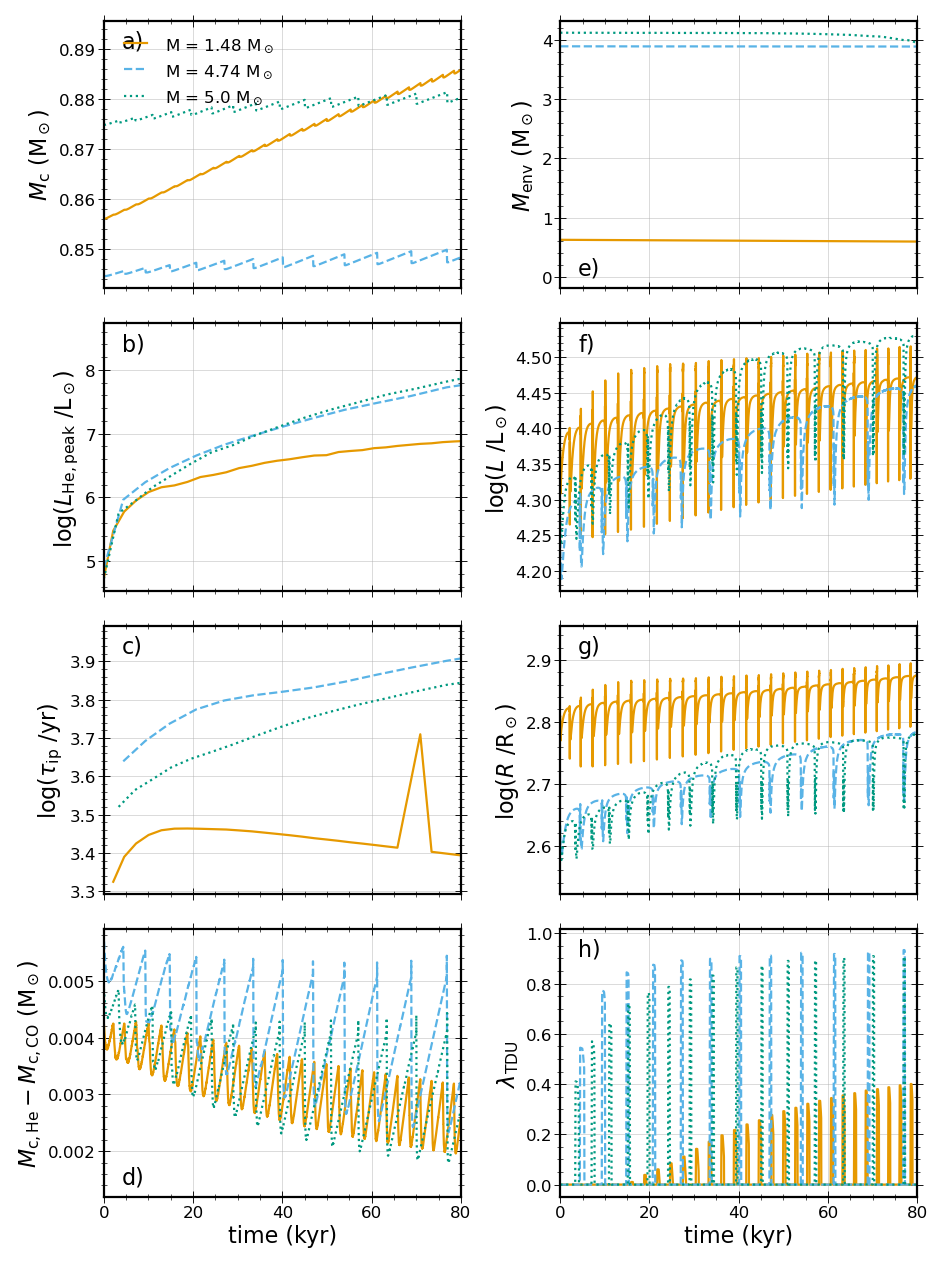

In [421]:

def find_maxima(quantity):
    maxima = argrelextrema(quantity, np.greater)[0]
    checked_maxima = [maxima[0]]
    for m in maxima[1:]:
        if quantity[m]>quantity[checked_maxima[-1]]:
            checked_maxima+=[m]

    return checked_maxima

def find_minima(quantity):
    minima = argrelextrema(quantity, np.less)[0]
    checked_minima = [minima[0]]
    for m in minima[1:]:
        if quantity[m]<quantity[checked_minima[-1]]:
            checked_minima+=[m]

    return checked_minima

m_CME_higher = mp.MESA()
m_CME_lower = mp.MESA()
m_stripped = mp.MESA()

m_stripped.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/1.48/LOGS_TPAGB_4.74')
m_CME_lower.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/4.74/LOGS_TPAGB_4.74')
m_CME_higher.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/5.0/LOGS_TPAGB')

fig,ax=plt.subplots(4,2,figsize=(12,16),sharex=True)

for m in [m_stripped,m_CME_lower,m_CME_higher]:

    M = round(m.hist['star_mass'][0],2)
    Mc = round(m.hist['he_core_mass'][0],2)
    LHe_peaks = find_maxima(m.hist['log_LHe'])
    Mint_minima = find_minima(m.hist['he_core_mass']-m.hist['co_core_mass'])[:]

    ax[0][0].plot(m.hist['star_age']/1e3,m.hist['he_core_mass'], label='M = {}'.format(M)+'$~\mathrm{M}_\odot$')
    ax[0][0].set(ylabel='$M_\mathrm{c}~(\mathrm{M}_\odot)$')

    ax[1][0].plot(m.hist['star_age'][LHe_peaks]/1e3,(m.hist['log_LHe'])[LHe_peaks])
    ax[1][0].set(ylabel='$\log(L_\mathrm{He,peak}~/\mathrm{L}_\odot)$')

    # ax[2][0].plot(m.hist['star_age'],m.hist['log_LHe'])
    # ax[2][0].set(ylabel='log_LHe')
    ax[2][0].plot(m.hist['star_age'][LHe_peaks][1:]/1e3,np.log10(np.diff(m.hist['star_age'][LHe_peaks])))
    ax[2][0].set(ylabel=r'$\log(\tau_\mathrm{ip}~/\mathrm{yr})$')

    ax[3][0].plot(m.hist['star_age']/1e3,(m.hist['he_core_mass']-m.hist['co_core_mass']))
    ax[3][0].set(ylabel='$M_\mathrm{c,He}-M_\mathrm{c,CO}~(\mathrm{M}_\odot)$')


    ax[0][1].plot(m.hist['star_age']/1e3,m.hist['star_mass']-m.hist['he_core_mass'])
    ax[0][1].set(ylabel='$M_\mathrm{env}~(\mathrm{M}_\odot)$')
    ax[1][1].plot(m.hist['star_age']/1e3,m.hist['log_L'])
    ax[1][1].set(ylabel='$\log(L~/\mathrm{L}_\odot)$')
    ax[2][1].plot(m.hist['star_age']/1e3,m.hist['log_R'])
    ax[2][1].set(ylabel='$\log(R~/\mathrm{R}_\odot)$')
    ax[3][1].plot(m.hist['star_age']/1e3,m.hist['lambda_DUP'])
    ax[3][1].set(ylabel=r'$\lambda_\mathrm{TDU}$')

ax[0][0].legend(frameon=False)
ax[0][0].text(0.05,0.9,'a)',transform=ax[0][0].transAxes)
ax[1][0].text(0.05,0.9,'b)',transform=ax[1][0].transAxes)
ax[2][0].text(0.05,0.9,'c)',transform=ax[2][0].transAxes)
ax[3][0].text(0.05,0.05,'d)',transform=ax[3][0].transAxes)
ax[0][1].text(0.05,0.05,'e)',transform=ax[0][1].transAxes)
ax[1][1].text(0.05,0.9,'f)',transform=ax[1][1].transAxes)
ax[2][1].text(0.05,0.9,'g)',transform=ax[2][1].transAxes)
ax[3][1].text(0.05,0.9,'h)',transform=ax[3][1].transAxes)
ax[3][0].set(xlabel='time (kyr)')
ax[3][1].set(xlabel='time (kyr)')
ax[0][0].set_xlim(0,80)
fig.tight_layout()

plt.savefig(f'plots/Z{metallicity}_{evol_phase}_CME_vs_stripped.jpeg',dpi=200)
plt.show()

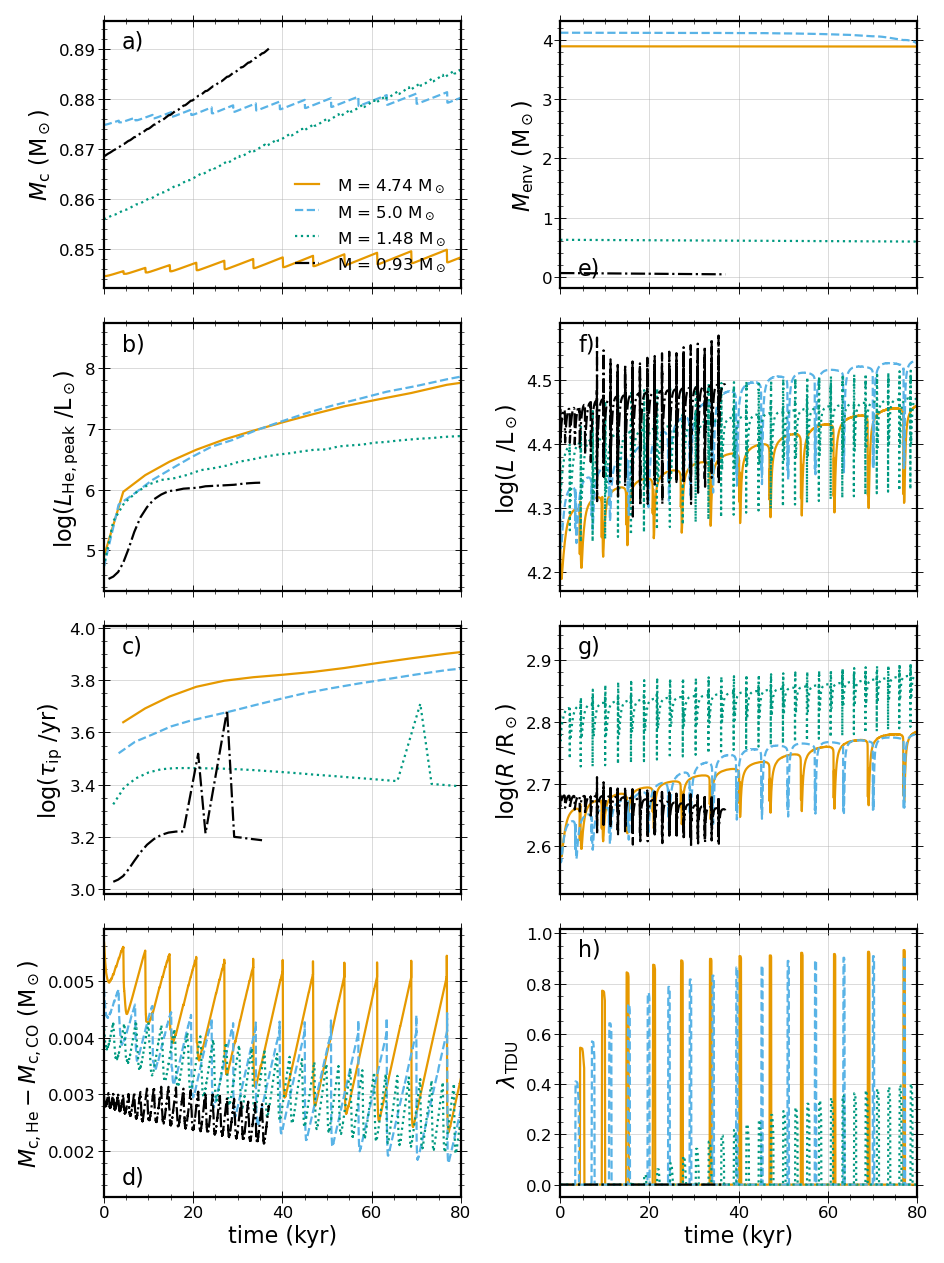

In [420]:


m_CME_higher = mp.MESA()
m_CME_lower = mp.MESA()
m_stripped = mp.MESA()
m_more_stripped = mp.MESA()
m_CME_3 = mp.MESA()

m_stripped.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/1.48/LOGS_TPAGB_4.74')
m_CME_lower.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/4.74/LOGS_TPAGB_4.74')
m_CME_higher.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/5.0/LOGS_TPAGB')
m_more_stripped.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/0.93/LOGS_TPAGB_3.72')
m_CME_3.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB')

fig,ax=plt.subplots(4,2,figsize=(12,16),sharex=True)

for m in [m_CME_lower,m_CME_higher,m_stripped,m_more_stripped]:
    M = round(m.hist['star_mass'][0],2)
    Mc = round(m.hist['he_core_mass'][0],2)
    LHe_peaks = find_maxima(m.hist['log_LHe'])
    Mint_minima = find_minima(m.hist['he_core_mass']-m.hist['co_core_mass'])[:]

    ax[0][0].plot(m.hist['star_age']/1e3,m.hist['he_core_mass'], label='M = {}'.format(M)+'$~\mathrm{M}_\odot$')
    ax[0][0].set(ylabel='$M_\mathrm{c}~(\mathrm{M}_\odot)$')

    ax[1][0].plot(m.hist['star_age'][LHe_peaks]/1e3,(m.hist['log_LHe'])[LHe_peaks])
    ax[1][0].set(ylabel='$\log(L_\mathrm{He,peak}~/\mathrm{L}_\odot)$')

    # ax[2][0].plot(m.hist['star_age'],m.hist['log_LHe'])
    # ax[2][0].set(ylabel='log_LHe')
    ax[2][0].plot(m.hist['star_age'][LHe_peaks][1:]/1e3,np.log10(np.diff(m.hist['star_age'][LHe_peaks])))
    ax[2][0].set(ylabel=r'$\log(\tau_\mathrm{ip}~/\mathrm{yr})$')

    ax[3][0].plot(m.hist['star_age']/1e3,(m.hist['he_core_mass']-m.hist['co_core_mass']))
    ax[3][0].set(ylabel='$M_\mathrm{c,He}-M_\mathrm{c,CO}~(\mathrm{M}_\odot)$')


    ax[0][1].plot(m.hist['star_age']/1e3,m.hist['star_mass']-m.hist['he_core_mass'])
    ax[0][1].set(ylabel='$M_\mathrm{env}~(\mathrm{M}_\odot)$')
    ax[1][1].plot(m.hist['star_age']/1e3,m.hist['log_L'])
    ax[1][1].set(ylabel='$\log(L~/\mathrm{L}_\odot)$')
    ax[2][1].plot(m.hist['star_age']/1e3,m.hist['log_R'])
    ax[2][1].set(ylabel='$\log(R~/\mathrm{R}_\odot)$')
    ax[3][1].plot(m.hist['star_age']/1e3,m.hist['lambda_DUP'])
    ax[3][1].set(ylabel=r'$\lambda_\mathrm{TDU}$')

ax[0][0].legend(frameon=False)
ax[0][0].text(0.05,0.9,'a)',transform=ax[0][0].transAxes)
ax[1][0].text(0.05,0.9,'b)',transform=ax[1][0].transAxes)
ax[2][0].text(0.05,0.9,'c)',transform=ax[2][0].transAxes)
ax[3][0].text(0.05,0.05,'d)',transform=ax[3][0].transAxes)
ax[0][1].text(0.05,0.05,'e)',transform=ax[0][1].transAxes)
ax[1][1].text(0.05,0.9,'f)',transform=ax[1][1].transAxes)
ax[2][1].text(0.05,0.9,'g)',transform=ax[2][1].transAxes)
ax[3][1].text(0.05,0.9,'h)',transform=ax[3][1].transAxes)
ax[3][0].set(xlabel='time (kyr)')
ax[3][1].set(xlabel='time (kyr)')
ax[0][0].set_xlim(0,80)
fig.tight_layout()


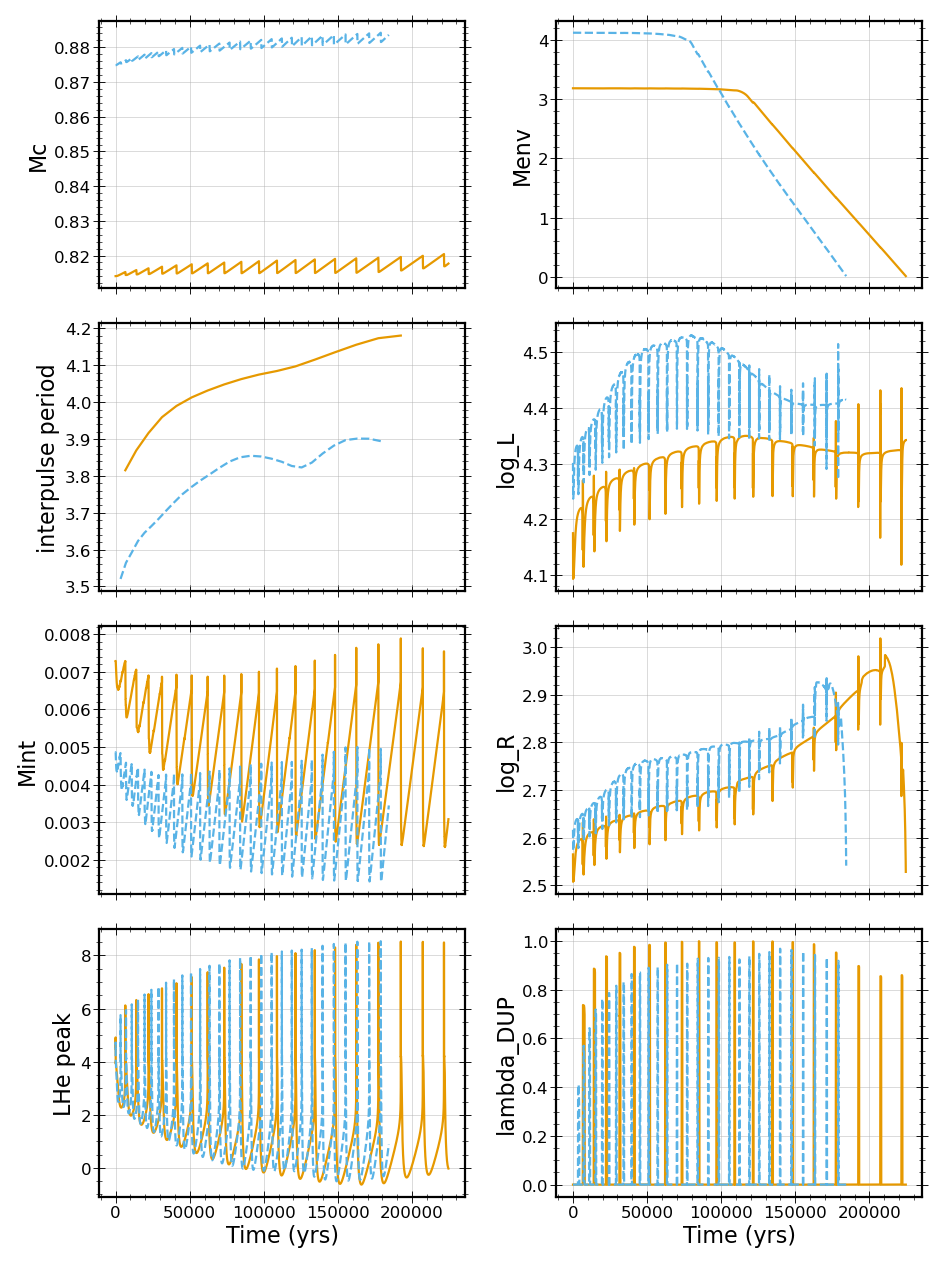

In [365]:


m_CME_higher = mp.MESA()
m_CME_lower = mp.MESA()
m_stripped = mp.MESA()
m_CME_3 = mp.MESA()

m_stripped.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/1.48/LOGS_TPAGB_4.74')
m_CME_lower.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/4.0/LOGS_TPAGB')
m_CME_higher.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/5.0/LOGS_TPAGB')
m.loadHistory('/Users/natalierees/MINT_grids_23051/Z0.02/TPAGB/0.93/LOGS_TPAGB_3.72')
m_CME_3.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB')

fig,ax=plt.subplots(4,2,figsize=(12,16),sharex=True)

for m in [m_CME_lower,m_CME_higher,]:
    LHe_peaks = find_maxima(m.hist['log_LHe'])
    Mint_minima = find_minima(m.hist['he_core_mass']-m.hist['co_core_mass'])[:]

    ax[0][0].plot(m.hist['star_age'],m.hist['he_core_mass'])
    ax[0][0].set(ylabel='Mc')


    # ax[2][0].plot(m.hist['star_age'],m.hist['log_LHe'])
    # ax[2][0].set(ylabel='log_LHe')
    ax[1][0].plot(m.hist['star_age'][LHe_peaks][1:],np.log10(np.diff(m.hist['star_age'][LHe_peaks])))
    ax[1][0].set(ylabel='interpulse period')

    ax[2][0].plot(m.hist['star_age'],(m.hist['he_core_mass']-m.hist['co_core_mass']))
    ax[2][0].set(ylabel='Mint')

    ax[3][0].plot(m.hist['star_age'],(m.hist['log_LHe']))
    # ax[3][0].plot(m.hist['star_age'][LHe_peaks],(m.hist['log_LHe'])[LHe_peaks])
    ax[3][0].set(ylabel='LHe peak')

    ax[0][1].plot(m.hist['star_age'],m.hist['star_mass']-m.hist['he_core_mass'])
    ax[0][1].set(ylabel='Menv')
    ax[1][1].plot(m.hist['star_age'],m.hist['log_L'])
    ax[1][1].set(ylabel='log_L')
    ax[2][1].plot(m.hist['star_age'],m.hist['log_R'])
    ax[2][1].set(ylabel='log_R')
    ax[3][1].plot(m.hist['star_age'],m.hist['lambda_DUP'])
    ax[3][1].set(ylabel='lambda_DUP')

ax[3][0].set(xlabel='Time (yrs)')
ax[3][1].set(xlabel='Time (yrs)')
# ax[0][0].set_xlim(0,80000)
fig.tight_layout()


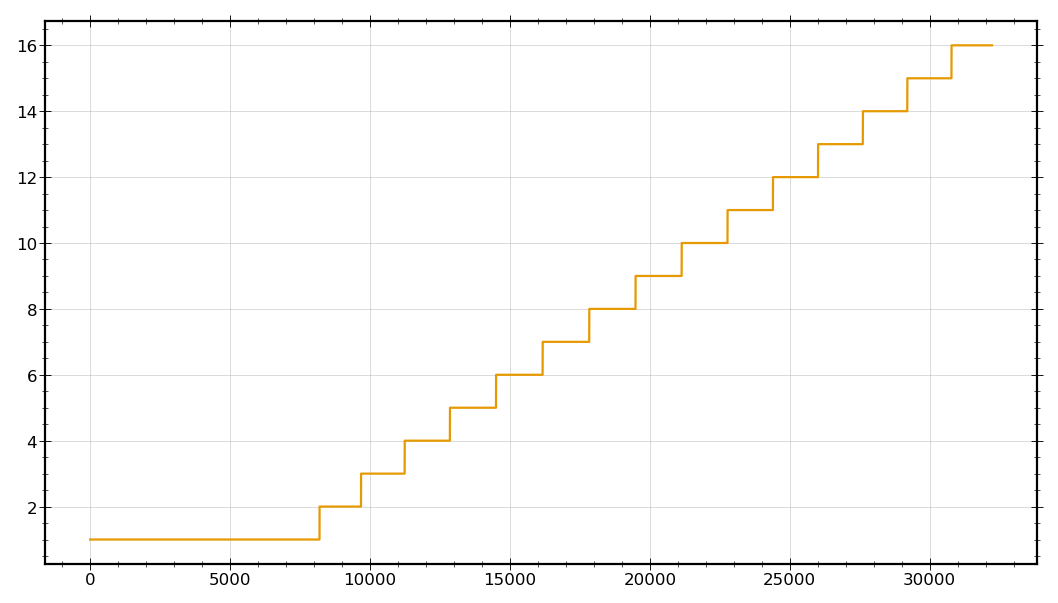

In [411]:
plt.plot(m_more_stripped.hist['star_age'],m_more_stripped.hist['TP_count'])